# Assignment 1

# Linear and Logistic Regression

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Q1. Linear Regression

car_year_price.csv file contains price of second-hand Hyundai grand i10 car with respect to year of making. Find the best linear relationship between year and price. Can you predict the possible price of a 2022 model second-hand grand i10?

### Data Loading

In [2]:
cp = pd.read_csv('car_age_price.csv')
cp.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [3]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


**Inference:**

* Dataset have 112 rows and two features, Year and Price.
* Both the features are int64 (integer) data type.
* No null values present.
* Target(Dependent varaible): Price, Feature (Independent variable): Year

### Data Vizualization

Text(0, 0.5, 'Price')

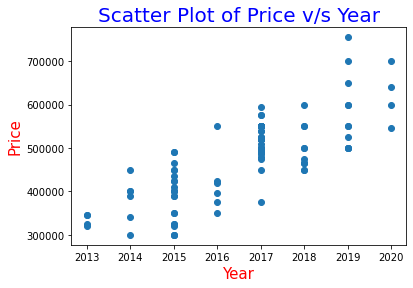

In [4]:
plt.scatter(cp['Year'],cp['Price'])
plt.title('Scatter Plot of Price v/s Year',fontsize = 20, color = 'Blue')
plt.xlabel('Year',fontsize = 15, color = 'Red')
plt.ylabel('Price',fontsize = 15, color = 'Red')

**Inferences:**

* As the vehicle is getting older, the price of the vehicle is diminished.

### Model Building

In [5]:
from sklearn.linear_model import LinearRegression
model_cp = LinearRegression()

In [6]:
model_cp.fit(cp['Year'][:, np.newaxis], cp['Price'])

LinearRegression()

In [7]:
print("Model slope:    ", model_cp.coef_[0])
print("Model intercept:", model_cp.intercept_)

Model slope:     43453.37988792975
Model intercept: -87147246.05488418


In [8]:
xfit = np.arange(2012,2023)
print(xfit)

[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


In [9]:
yfit = model_cp.coef_[0]*xfit + model_cp.intercept_

Text(0, 0.5, 'Price')

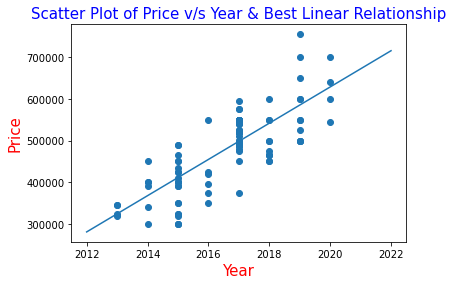

In [10]:
plt.plot(xfit,yfit)
plt.scatter(cp['Year'],cp['Price'])
plt.title('Scatter Plot of Price v/s Year & Best Linear Relationship',fontsize = 15, color = 'Blue')
plt.xlabel('Year',fontsize = 15, color = 'Red')
plt.ylabel('Price',fontsize = 15, color = 'Red')

In [11]:
print('The possible price of a 2022 model second-hand grand i10 is Rs.',model_cp.predict([[2022]])[0].round(2))

The possible price of a 2022 model second-hand grand i10 is Rs. 715488.08


## Q2. Logistic Regression

Iris.csv file contains details of iris flowers. Iris is a flower found mainly in Asian countries. Iris flowers have an unusual structure and appearance. It contains sepals and petals as shown in the image below. Two different species of iris flowers are present in the dataset. 

Use logistic regression to predict whether a flower belongs to species 0 (Setosa) or species 1(Versicolor) **from SepalLengthCm column alone**. Which species a flower with sepal length 7.5cm belong to??

### Data Loading

In [12]:
sp = pd.read_csv('Iris.csv')
sp.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [13]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 4.8 KB


In [14]:
sp['Species'].unique()

array([0, 1], dtype=int64)

**Inference:**
* There are 100 rows and 6 features in this data set.
* Two of the features are of integer data type and the rest are float data type.
* No null values are present.
* There are two species are listed in the dataset, 0:Setosa & 1:Versicolor.
* As per the question demands, we want to consider independent varaible **SepalLengthCm** feature alone for predict the target(dependent variable) Species.

In [15]:
sl = sp['SepalLengthCm']
tar = sp['Species']

### Vizualizing Data

{'whiskers': [<matplotlib.lines.Line2D at 0x182a6e80fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x182a6e8f6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x182a6e80c40>],
 'medians': [<matplotlib.lines.Line2D at 0x182a6e8fd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x182a6e9d100>],
 'means': []}

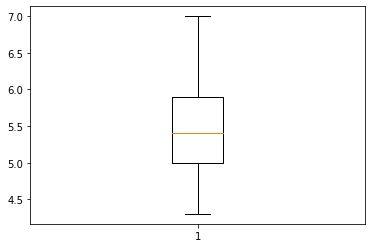

In [16]:
plt.boxplot(sl)

**Inference:**

* There is no outliers are present

Text(0, 0.5, 'Species Class')

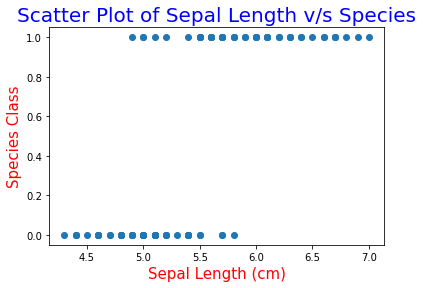

In [17]:
plt.scatter(sl,tar)
plt.title('Scatter Plot of Sepal Length v/s Species',fontsize = 20, color = 'Blue')
plt.xlabel('Sepal Length (cm)',fontsize = 15, color = 'red')
plt.ylabel('Species Class',fontsize = 15, color = 'red')

### Model Building

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sp[['SepalLengthCm']],sp.Species,train_size=0.8,random_state = 10)

In [19]:
from sklearn.linear_model import LogisticRegression
model_sp = LogisticRegression()

In [20]:
model_sp.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = model_sp.predict(X_test)

In [22]:
X_test

,SepalLengthCm
19,5.1
14,5.8
43,5.0
37,4.9
66,5.6
3,4.6
79,5.7
41,4.5
38,4.4
68,6.2


In [23]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
      dtype=int64)

In [24]:
y_test

19    0
14    0
43    0
37    0
66    1
3     0
79    1
41    0
38    0
68    1
2     0
1     0
60    1
53    1
95    1
74    1
92    1
26    0
59    1
46    0
Name: Species, dtype: int64

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.85

In [26]:
model_sp.coef_

array([[3.0455916]])

In [27]:
model_sp.intercept_

array([-16.62483543])

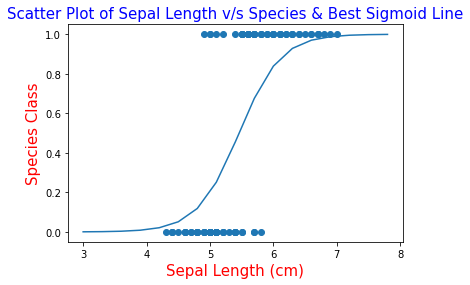

In [28]:
plt.scatter(sl,tar)
plt.title('Scatter Plot of Sepal Length v/s Species & Best Sigmoid Line',fontsize = 15, color = 'Blue')
plt.xlabel('Sepal Length (cm)',fontsize = 15, color = 'red')
plt.ylabel('Species Class',fontsize = 15, color = 'red')
x = np.arange(3,8,0.3)
m=3.0455916
b=-16.62483543
y = 1/(1+np.exp(-(m*x+b)))
plt.plot(x,y)

### Prediction

In [29]:
print('A flower with sepal length 7.5cm belong to class',model_sp.predict([[7.5]])[0],'(Versicolor) Species.')

A flower with sepal length 7.5cm belong to class 1 (Versicolor) Species.


##### Jibin K Joy, ML & AI KKEM August 2022 Batch